In [1]:
from matplotlib import pyplot
import numpy
import os

In [5]:
basedir = '../outputs/cosine/'

data = {}


for x in os.listdir(basedir):
    lbase = os.path.join(basedir, x)
    if os.path.isdir(lbase):
        if x.startswith("L="):
            L = int(x[2:])
        else:
            continue
        
        all_ks = []
        all_actions = []

        mean_points = []
        for x in os.listdir(lbase):
            if x.endswith('.npz'):
                arr = numpy.load(os.path.join(lbase, x))

                if 'energies' in arr:
                    x = arr['energies']
                elif 'actions' in arr:
                    x = arr['actions']
                ks = 1.0/arr['ks']

                for (k, xx) in zip(ks, x.T):
                    xxx = xx - xx.mean()

                    binder = 1.0 - (xxx**4).mean() / (3 * ((xxx**2).mean()**2))
                    mean_points.append((k, xx.mean() / (L**4), xx.var() / (L**4), binder))
                    all_ks.extend([k]*len(xx))
                    all_actions.extend(xx / (L**4))
                    
        unique_ks, mean_actions, std_actions, binder_actions = zip(*sorted(mean_points, key=lambda x: x[0]))
        data[L] = (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions)

In [6]:
data.keys()

dict_keys([28, 12, 32, 24, 6, 8, 4, 10, 20, 16])

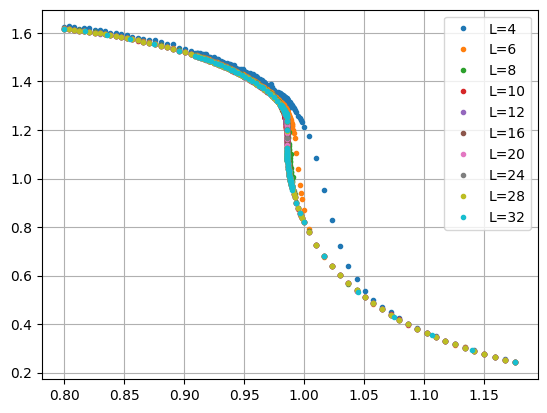

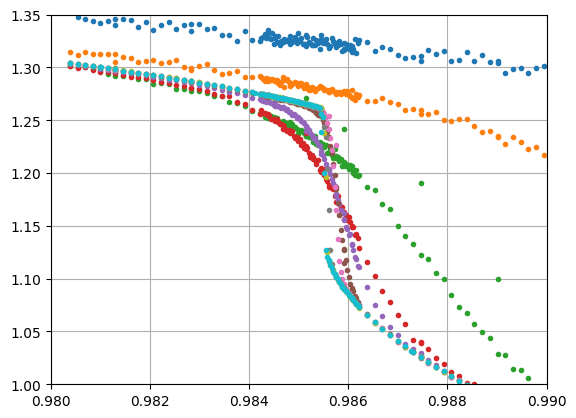

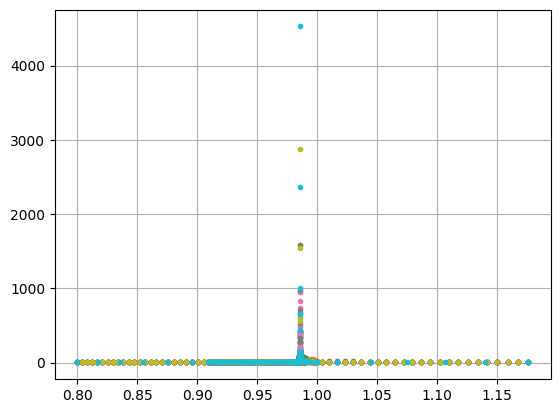

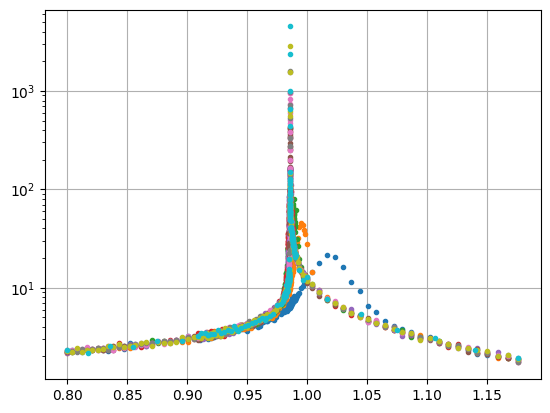

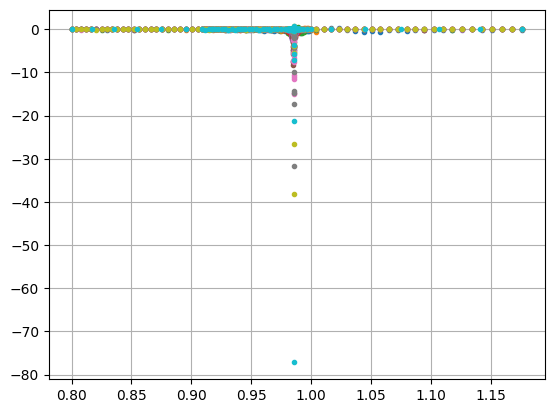

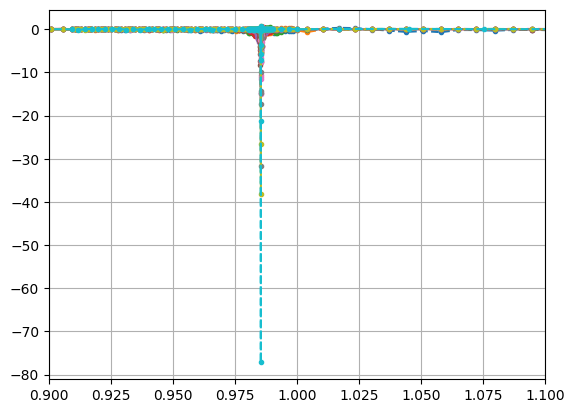

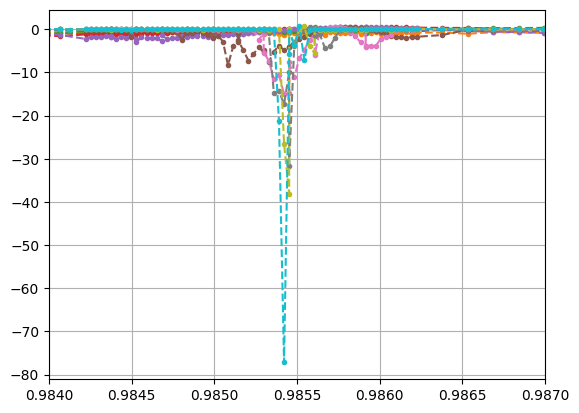

In [29]:
for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, mean_actions, '.', label=f'L={L}')
pyplot.grid()
pyplot.legend()
pyplot.show()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, mean_actions, '.', label=f'L={L}')
pyplot.xlim((0.98, 0.99))
pyplot.ylim((1.0, 1.35))
pyplot.grid()
pyplot.show()


for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, std_actions, '.', label=f'L={L}')
pyplot.grid()
pyplot.show()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, std_actions, '.', label=f'L={L}')
pyplot.grid()
pyplot.yscale('log')
pyplot.show()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, binder_actions, '.')
pyplot.grid()
pyplot.show()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, binder_actions, '.--')
pyplot.xlim((0.9, 1.1))
pyplot.grid()
pyplot.show()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    pyplot.plot(unique_ks, binder_actions, '.--')
pyplot.xlim((0.984, 0.987))
pyplot.grid()
pyplot.show()

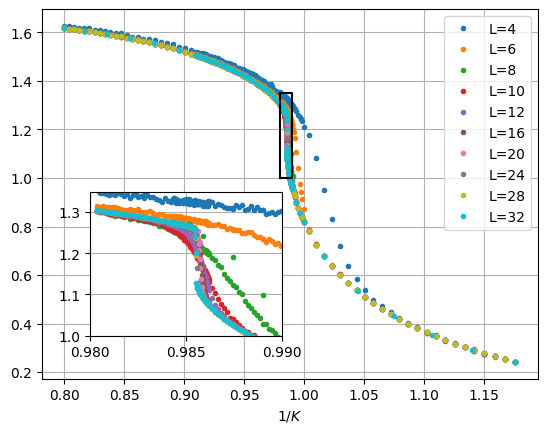

In [26]:
fig, ax1 = pyplot.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.2, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    ax1.plot(unique_ks, mean_actions, '.', label=f'L={L}')
ax1.plot([0.98, 0.99, 0.99, 0.98, 0.98], [1.0, 1.0, 1.35, 1.35, 1.0], c='black')
ax1.grid()
ax1.legend()

for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    ax2.plot(unique_ks, mean_actions, '.', label=f'L={L}')
ax2.set_xlim((0.98, 0.99))
ax2.set_ylim((1.0, 1.35))
ax2.grid()

ax1.set_xlabel(r"$1/K$")

pyplot.show()

/tmp/ipykernel_4083/140281617.py:30: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(numpy.log(arr.T), interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])


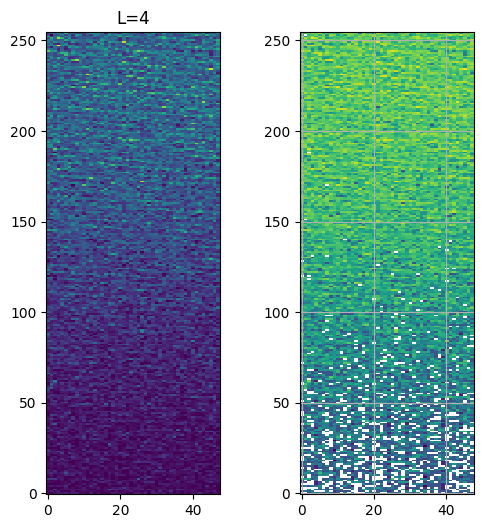

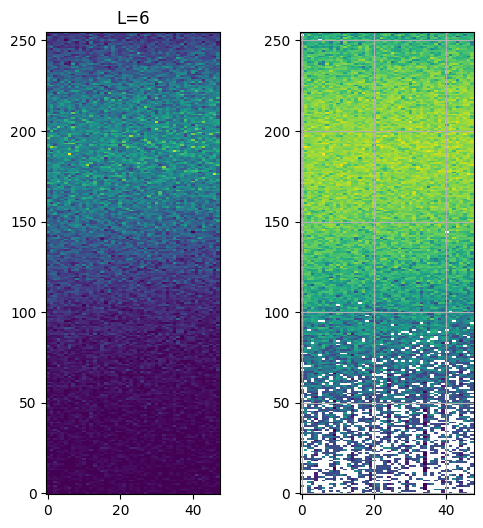

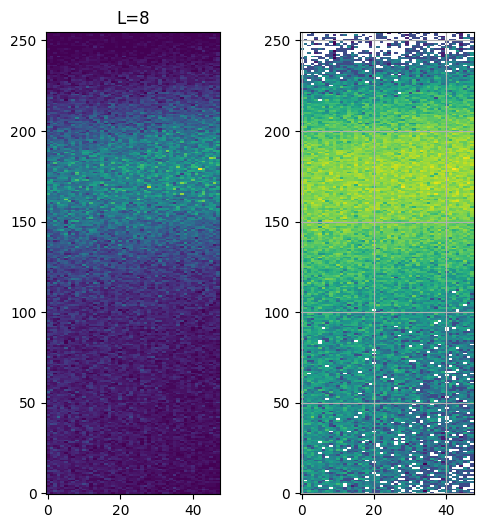

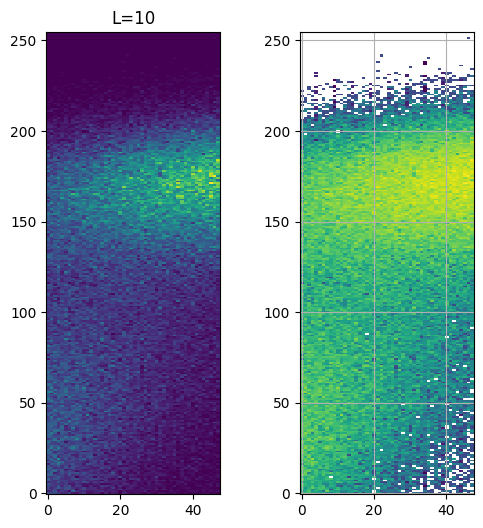

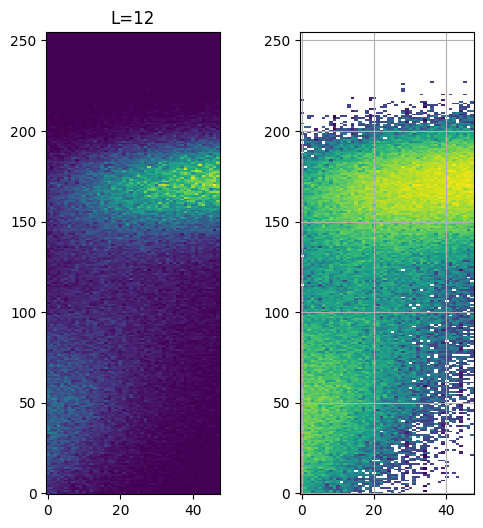

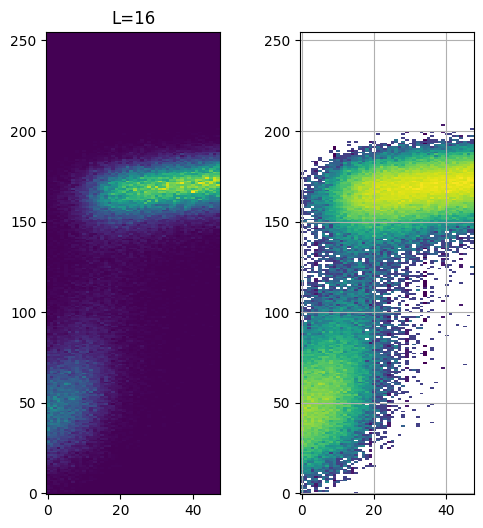

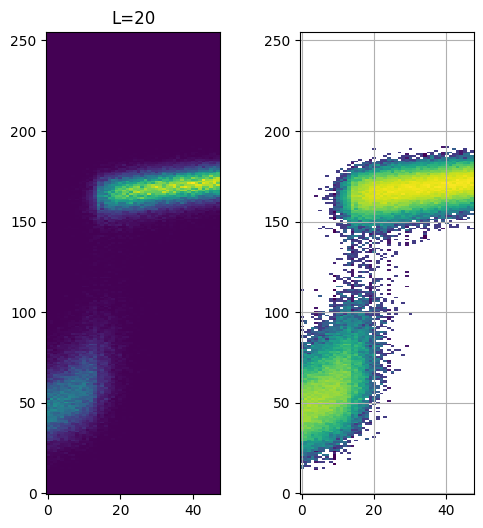

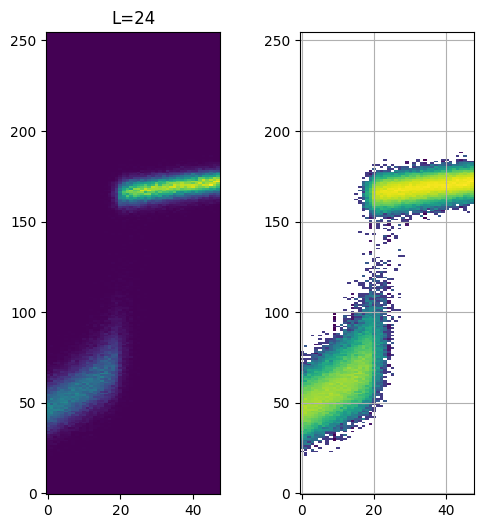

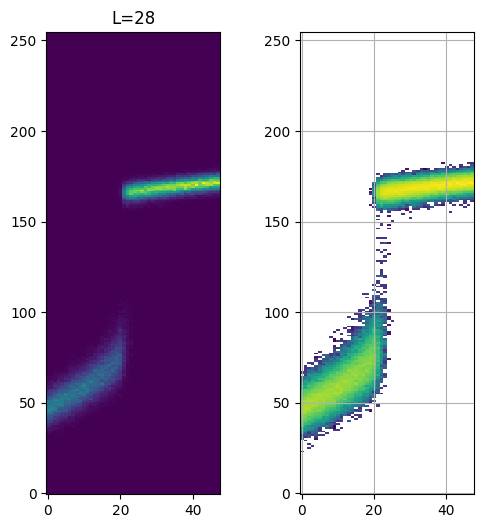

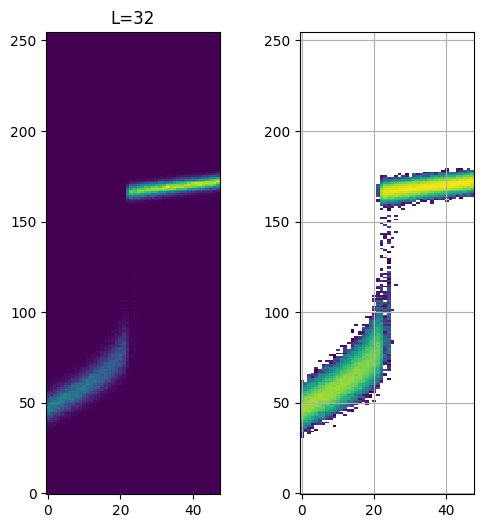

In [6]:
for L, (all_ks, all_actions, unique_ks, mean_actions, std_actions, binder_actions) in sorted(data.items()):
    ndigits = 128
    ks_digits = numpy.digitize(all_ks, numpy.linspace(1.014, 1.0155, ndigits))

    kd_bins = {}

    for kd, action in zip(ks_digits, all_actions):
        if kd == 0 or kd == ndigits:
            continue
        if kd not in kd_bins:
            kd_bins[kd] = []
        kd_bins[kd].append(action)

    arr = []

    for kd in sorted(kd_bins.keys()):
        actions = kd_bins[kd]
        hist_actions, _ = numpy.histogram(actions, bins=numpy.linspace(1.0,1.4,256), density=True)
        hist_actions = hist_actions / sum(hist_actions)
        arr.append(hist_actions)
    arr = numpy.array(arr)
    
    fig, axs = pyplot.subplots(1, 2, figsize=(6,6))
    
    axs[0].set_title(f"L={L}")
    axs[0].imshow(arr.T, interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])
    axs[0].set_aspect(0.5)
    axs[0].invert_yaxis()
    
    axs[1].imshow(numpy.log(arr.T), interpolation='none') #, extent=[0.775,0.777, 1.0,1.25])
    axs[1].set_aspect(0.5)
    axs[1].invert_yaxis()
    axs[1].grid()
    
    pyplot.show()